# Boston Neighbourhood

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('boston-neighborhood-data.csv')

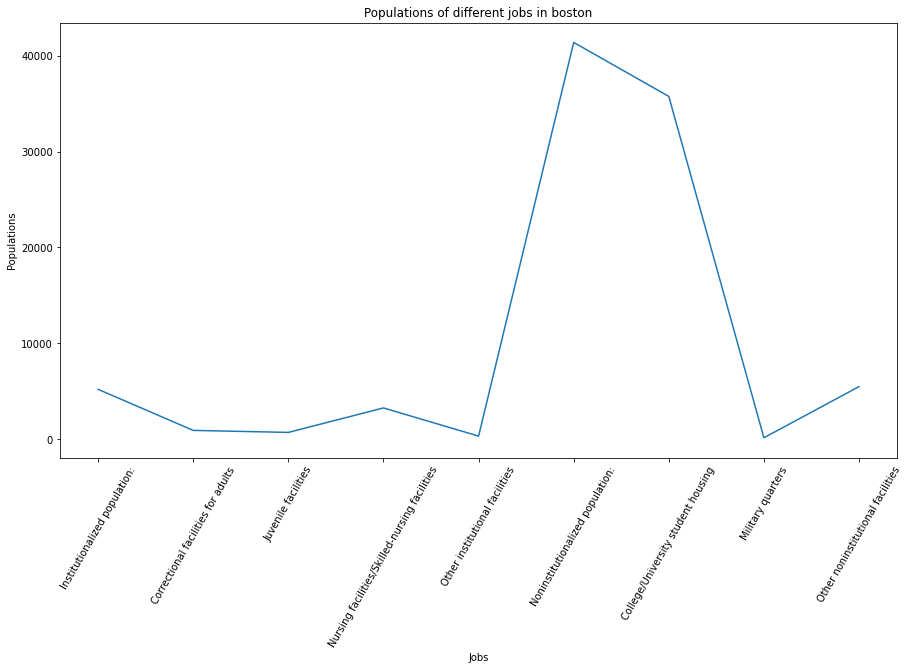

In [75]:
i = df.columns.get_loc('P0050002')
j = df.columns.get_loc('P0050010')
job_df = df[df.columns[i:j + 1]]
col = job_df.loc[0].values.tolist()
#print(col)

test_data = job_df[1:]
test_data.columns = col
#print(test_data)
col = df.loc[0][i:j + 1].values.tolist()
x = col
y = test_data.astype('float').sum()

fig = plt.figure(figsize=(15,8))
plt.xticks(range(len(x)), x)
plt.xticks(rotation=60)

plt.xlabel("Jobs")
plt.ylabel("Populations")
plt.title("Populations of different jobs in boston")

plt.plot(x, y)
plt.show()

As we see the graph above, we can find that the job type "Noninstitutionalized population" has the highet population and then is "College/University student". The job type "Other institutional facilities" has the lowest population.  
  
    

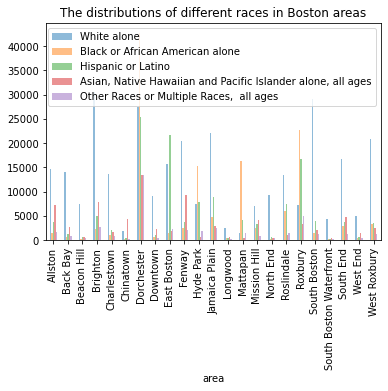

In [77]:
import matplotlib.pyplot as plt

col = df.loc[0].values.tolist()
#print(col)

area_df = pd.DataFrame()
area_df['area'] = df['nbhd']
area_df = area_df[1:]

i = df.columns.get_loc('P0020005')
j = df.columns.get_loc('P002others')
race_df = df[df.columns[i:j + 1]]
race_df = race_df[1:]

col = df.loc[0][i:j + 1].values.tolist()
race_df.columns = col
race_df = race_df.astype(float)

area_df = pd.concat([area_df, race_df.reindex(area_df.index)], axis=1)

area_df.groupby('area').sum().plot(kind='bar', legend=True, alpha=.5)
plt.title("The distributions of different races in Boston areas")
plt.show()


The graph above shows that the population of “White alone” is the largest in the Boston area, while "Asian, Native Hawaiian and Pacific Islander alone, all ages" has the lowest population.  
Since the gap between the population of “White alone” and other races is large, especially the race of "Asian, Native Hawaiian and Pacific Islander alone, all ages", there might be a risk of the distribution of relief funds between different races.

In [84]:
business_df = pd.read_csv("Business Assistance Funds.csv")
business_df = business_df.dropna()
business_df.reset_index(drop=True)
business_df

,Business Name,Neighborhood
6,@UNION,Allston
7,3D Printsmith LLC,Allston
8,A-Z Physical Therapy and Wellness,Allston
9,Ada DeTour Photography,Allston
10,ALLSTON BILLIARDS,Allston
...,...,...
1849,"Timothy N. Smith, DMD",West Roxbury
1850,"TINT, LLC",West Roxbury
1851,Turbo Construction,West Roxbury
1852,West Roxbury Dental Arts,West Roxbury


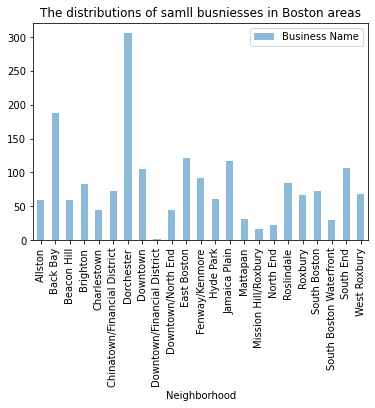

In [88]:
business_df.groupby('Neighborhood').count().plot(kind='bar', legend=True, alpha=.5)
plt.title("The distributions of samll busniesses in Boston areas")
plt.show()

The graph above shows that Dorchester has the most samll busniesses, and then is Back Bay, while Downtown/ Financial District has the least number of business.

# Analysis of Rental Relif Funds

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

redacted_df1 = pd.read_csv('redacted-Results-Oct20-Mar21.csv')
redacted_df2 = pd.read_csv('redacted-Results-April21-Sept21.csv')

### Analysis of 'redacted-Results-Oct20-Mar21.csv'

In [4]:
print(redacted_df1.shape)
print(redacted_df1.columns.to_list(), '\n')
print(redacted_df1.dtypes)

redacted_df1.head()

(755, 21)
['id', 'notes', 'original_zip', 'manual_ zip ', 'match_kind', 'state_code', 'county_code', 'tract_code', 'block_code', 'RRF Award Amount ', 'No of months of assistance', 'Rent owing', 'RRF Award Type ', 'Mthly Self Employment', 'Mthly Unemployment', 'Mthly Interest or Dividend', 'Mthly Pension or Retirement', 'Mthly TANF/Public Assistance', 'Mthly Alimony income', 'Mthly Armed Forces income', 'Mthly Other income'] 

id                                int64
notes                            object
original_zip                     object
manual_ zip                     float64
match_kind                       object
state_code                        int64
county_code                       int64
tract_code                      float64
block_code                      float64
RRF Award Amount                 object
No of months of assistance       object
Rent owing                      float64
RRF Award Type                   object
Mthly Self Employment           float64
Mthly Unem

,id,notes,original_zip,manual_ zip,match_kind,state_code,county_code,tract_code,block_code,RRF Award Amount,...,Rent owing,RRF Award Type,Mthly Self Employment,Mthly Unemployment,Mthly Interest or Dividend,Mthly Pension or Retirement,Mthly TANF/Public Assistance,Mthly Alimony income,Mthly Armed Forces income,Mthly Other income
0,7,NaN,2119,NaN,Exact,25,25,81400.0,3003.0,6000,...,9444.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,NaN,2124,NaN,Exact,25,25,100300.0,3005.0,5700,...,1900.0,Arrears & Future payments,NaN,2140.0,NaN,NaN,NaN,NaN,NaN,NaN
2,56,NaN,2119,NaN,Exact,25,25,80100.0,1051.0,3750,...,4375.0,Arrears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,63,NaN,2128,NaN,Exact,25,25,51200.0,3000.0,4000,...,4000.0,Arrears & Future payments,NaN,NaN,NaN,NaN,NaN,530.0,NaN,NaN
4,75,NaN,2128,NaN,Exact,25,25,50101.0,3001.0,6000,...,7900.0,Arrears,800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


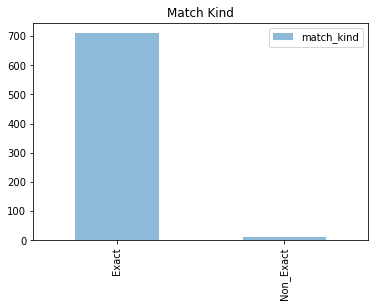

In [5]:
redacted_df1['match_kind'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.title("Match Kind")
plt.show()

<ipython-input-6-e4fd5b9d6804>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  redacted_df1['RRF Award Amount '][744] = float(1875)


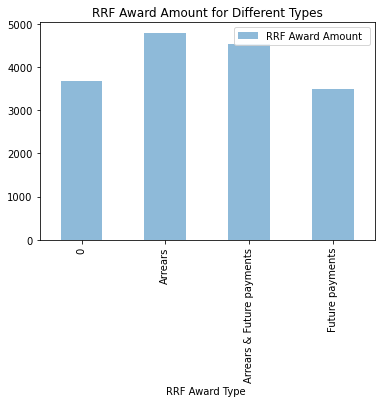

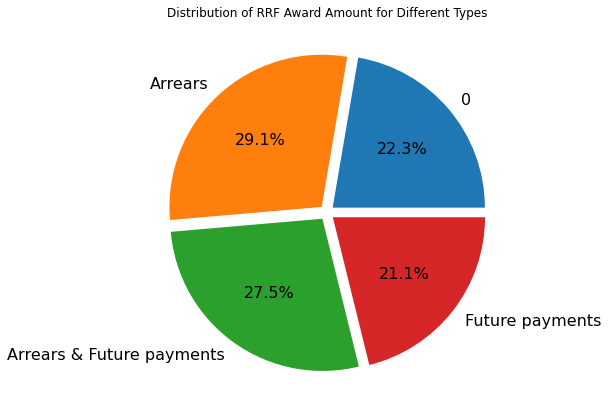

In [6]:
redacted_df1 = redacted_df1.fillna(0)
redacted_df1['RRF Award Amount '][744] = float(1875)
redacted_df1['RRF Award Amount '] = redacted_df1['RRF Award Amount '].astype(float)

temp = redacted_df1[['RRF Award Amount ', 'RRF Award Type ']].groupby('RRF Award Type ').mean()
temp.plot(kind='bar', legend=True, alpha=.5)
plt.title("RRF Award Amount for Different Types")
plt.show()

print('\n\n')

plt.figure(figsize=(7,7))
plt.pie(temp['RRF Award Amount '], labels = temp.index.to_list(), explode = [0.05, 0.05, 0.05, 0.05] ,autopct = '%1.1f%%' ,textprops = {'fontsize' : 16 })
plt.title("Distribution of RRF Award Amount for Different Types")
plt.show() 

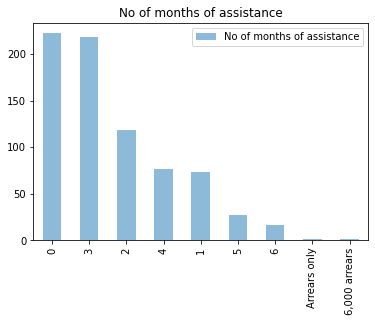

In [7]:
redacted_df1['No of months of assistance'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.title("No of months of assistance")
plt.show()

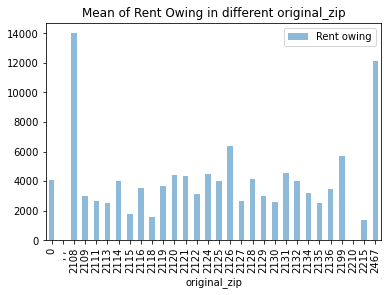

In [8]:
redacted_df1[['original_zip', 'Rent owing']].groupby('original_zip').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean of Rent Owing in different original_zip")
plt.show()

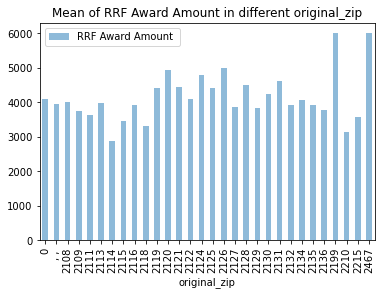

In [9]:
redacted_df1[['RRF Award Amount ', 'original_zip']].groupby('original_zip').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean of RRF Award Amount in different original_zip")
plt.show()

Text(0.5, 1.0, 'Rent owing vs RRF Award Amount ')

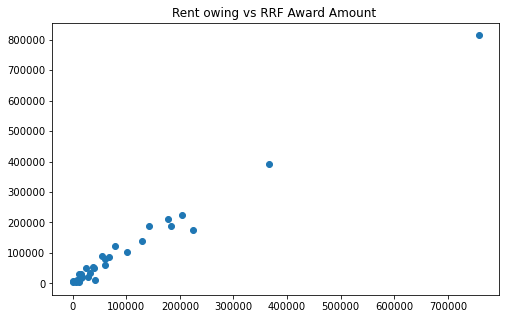

In [10]:
temp1 = redacted_df1.groupby('original_zip')['Rent owing'].sum().reset_index(name="Rent owing sum")
temp2 = redacted_df1.groupby('original_zip')['RRF Award Amount '].sum().reset_index(name="RRF Award Amount sum")
temp = temp1.merge(temp2)

plt.figure(figsize=(8,5))
plt.scatter(temp['Rent owing sum'],temp['RRF Award Amount sum'])
plt.title('Rent owing vs RRF Award Amount ')

<ipython-input-11-4a019587965a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['ratio'] = temp_df['RRF Award Amount sum'] /temp_df['Rent owing sum']


Text(0.5, 1.0, 'Rent owing vs RRF Award Amount in different original_zip')

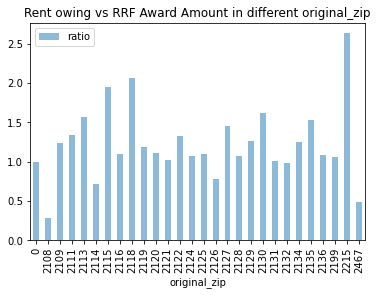

In [11]:
temp_df = temp.loc[temp['Rent owing sum']!=0]
temp_df['ratio'] = temp_df['RRF Award Amount sum'] /temp_df['Rent owing sum']

temp_df[['ratio', 'original_zip']].groupby('original_zip').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title('Rent owing vs RRF Award Amount in different original_zip')

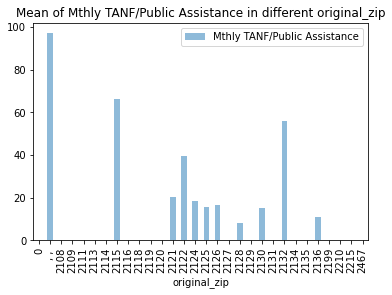

In [12]:
redacted_df1[['Mthly TANF/Public Assistance', 'original_zip']].groupby('original_zip').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean of Mthly TANF/Public Assistance in different original_zip")
plt.show()

### Analysis of 'redacted-Results-April21-Sept21.csv'

In [14]:
from re import sub
from decimal import Decimal

redacted_df2 = pd.read_csv('redacted-Results-April21-Sept21.csv')
print(redacted_df2.shape)
print(redacted_df2.columns.to_list(), '\n')
print(redacted_df2.dtypes)

temp = redacted_df2[~redacted_df2['Rental Relief Fund: Total Monthly Income all sources'].str.contains(r'\d+')]
redacted_df2.loc[~redacted_df2['Rental Relief Fund: Total Monthly Income all sources'].str.contains(r'\d+'), 'Rental Relief Fund: Total Monthly Income all sources'] = '0'

temp = redacted_df2[~redacted_df2['Rental Relief Gap'].str.contains(r'\d+')]
redacted_df2.loc[~redacted_df2['Rental Relief Gap'].str.contains(r'\d+'), 'Rental Relief Gap'] = '0'

redacted_df2['Total RRF Award'] = redacted_df2['Total RRF Award'].fillna('0').apply(lambda x: Decimal(sub(r'[^\d.]', '', x))).astype(float)
redacted_df2['Rental Relief Fund: How much rent do you owe due to COVID-19'] = redacted_df2['Rental Relief Fund: How much rent do you owe due to COVID-19'].fillna('0').apply(lambda x: Decimal(sub(r'[^\d.]', '', x))).astype(float)
redacted_df2['Rental Relief Fund: How much do you owe on utilities listed?'] = redacted_df2['Rental Relief Fund: How much do you owe on utilities listed?'].fillna('0').apply(lambda x: Decimal(sub(r'[^\d.]', '', x))).astype(float)
redacted_df2['Rental Relief Fund: Total Monthly Income all sources'] = redacted_df2['Rental Relief Fund: Total Monthly Income all sources'].fillna('0').apply(lambda x: Decimal(sub(r'[^\d.]', '', x))).astype(float)
redacted_df2['Rental Relief Gap'] = redacted_df2['Rental Relief Gap'].fillna('0').apply(lambda x: Decimal(sub(r'[^\d.]', '', x))).astype(float)
redacted_df2['Utility Payments - Amount obtained ($)'] = redacted_df2['Utility Payments - Amount obtained ($)'].fillna('0').apply(lambda x: Decimal(sub(r'[^\d.]', '', x))).astype(float)
redacted_df2['Future Stipend - Amount obtained ($)'] = redacted_df2['Future Stipend - Amount obtained ($)'].fillna('0').apply(lambda x: Decimal(sub(r'[^\d.]', '', x))).astype(float)
redacted_df2['Rental Arrears - Amount obtained ($)'] = redacted_df2['Rental Arrears - Amount obtained ($)'].fillna('0').apply(lambda x: Decimal(sub(r'[^\d.]', '', x))).astype(float)
redacted_df2['Moving Costs - Amount obtained ($)'] = redacted_df2['Moving Costs - Amount obtained ($)'].fillna('0').apply(lambda x: Decimal(sub(r'[^\d.]', '', x))).astype(float)

redacted_df2

(1413, 21)
['id', 'notes', 'original_zip', 'manual_match_zip', 'match', 'match_kind', 'state_code', 'county_code', 'tract_code', 'block_code', 'Rental Relief Fund: How much rent do you owe due to COVID-19', 'Rental Relief Fund: How much do you owe on utilities listed?', 'Rental Relief Fund: Total Monthly Income all sources', 'Rental Relief Gap', 'Months of Assistance Awarded', 'Date of Final Decision', 'Utility Payments - Amount obtained ($)', 'Future Stipend - Amount obtained ($)', 'Rental Arrears - Amount obtained ($)', 'Moving Costs - Amount obtained ($)', 'Total RRF Award'] 

id                                                                int64
notes                                                            object
original_zip                                                    float64
manual_match_zip                                                 object
match                                                            object
match_kind                                           

,id,notes,original_zip,manual_match_zip,match,match_kind,state_code,county_code,tract_code,block_code,...,Rental Relief Fund: How much do you owe on utilities listed?,Rental Relief Fund: Total Monthly Income all sources,Rental Relief Gap,Months of Assistance Awarded,Date of Final Decision,Utility Payments - Amount obtained ($),Future Stipend - Amount obtained ($),Rental Arrears - Amount obtained ($),Moving Costs - Amount obtained ($),Total RRF Award
0,161733,NaN,2121.0,NaN,Match,Non_Exact,25.0,25.0,10802.0,2001.0,...,0.00,0.00,0.00,July-21; August-21; September-21; October-21; ...,NaN,197.88,6000.0,2000.00,0.0,8197.88
1,161811,NaN,2124.0,NaN,Match,Non_Exact,25.0,25.0,701.0,3010.0,...,299.11,1203.00,3499.11,21-Apr,4/7/21,0.00,0.0,3200.00,0.0,3200.00
2,161824,NaN,2126.0,NaN,Match,Non_Exact,25.0,25.0,92400.0,4001.0,...,1724.21,794.00,1724.21,NaN,NaN,1500.00,0.0,0.00,0.0,1500.00
3,161837,NaN,2128.0,NaN,Match,Non_Exact,25.0,25.0,10802.0,2003.0,...,0.00,1000.00,30600.00,May-21; June-21; July-21; August-21; September-21,NaN,0.00,0.0,15000.00,0.0,15000.00
4,161839,NaN,NaN,2128,No_Match,NaN,NaN,NaN,50700.0,1001.0,...,0.00,1192.00,1501.00,September-21; October-21; November-21,8/17/21,0.00,4500.0,1501.00,0.0,6001.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408,169344,NaN,2128.0,NaN,Match,Exact,25.0,25.0,50700.0,3000.0,...,410.00,1074.00,1849.00,September-21; October-21; November-21; Decembe...,NaN,410.00,4317.0,4317.00,0.0,9044.00
1409,169757,NaN,2136.0,NaN,Match,Exact,25.0,25.0,140107.0,1005.0,...,538.00,3866.28,538.00,September-20; October-20,NaN,538.01,0.0,0.00,0.0,538.01
1410,169786,NaN,2121.0,NaN,Match,Non_Exact,25.0,25.0,100300.0,3008.0,...,0.00,0.00,0.00,October-21; November-21; December-21; January-...,NaN,0.00,1098.0,0.00,0.0,1098.00
1411,169864,NaN,2120.0,NaN,Match,Exact,25.0,25.0,80801.0,2005.0,...,16975.00,1223.00,18415.00,21-Oct,NaN,2000.00,0.0,0.00,0.0,2000.00


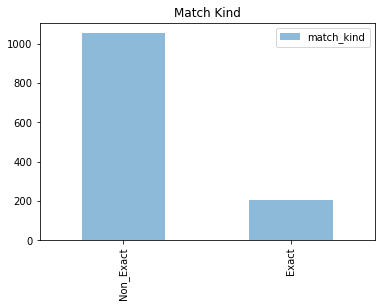

In [15]:
redacted_df2['match_kind'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.title("Match Kind")
plt.show()

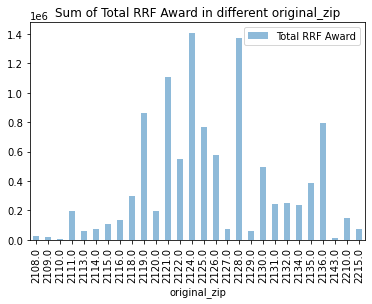

In [16]:
redacted_df2[['Total RRF Award', 'original_zip']].groupby('original_zip').sum().plot(kind='bar', legend=True, alpha=.5)
plt.title("Sum of Total RRF Award in different original_zip")
plt.show()

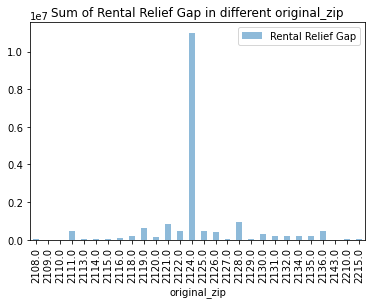

In [17]:
redacted_df2[['Rental Relief Gap', 'original_zip']].groupby('original_zip').sum().plot(kind='bar', legend=True, alpha=.5)
plt.title("Sum of Rental Relief Gap in different original_zip")
plt.show()

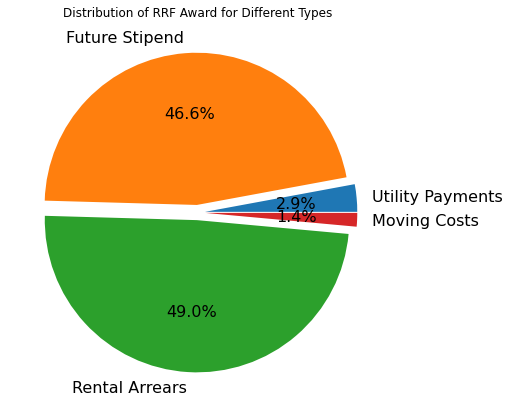

In [18]:
x = ['Utility Payments', 'Future Stipend', 'Rental Arrears', 'Moving Costs']
y = []
for i in x:
    y.append(redacted_df2[f'{i} - Amount obtained ($)'].sum())

plt.figure(figsize=(7,7))
plt.pie(y, labels = x, explode = [0.05, 0.05, 0.05, 0.05] ,autopct = '%1.1f%%' ,textprops = {'fontsize' : 16 })
plt.title("Distribution of RRF Award for Different Types")
plt.show() 

<BarContainer object of 28 artists>

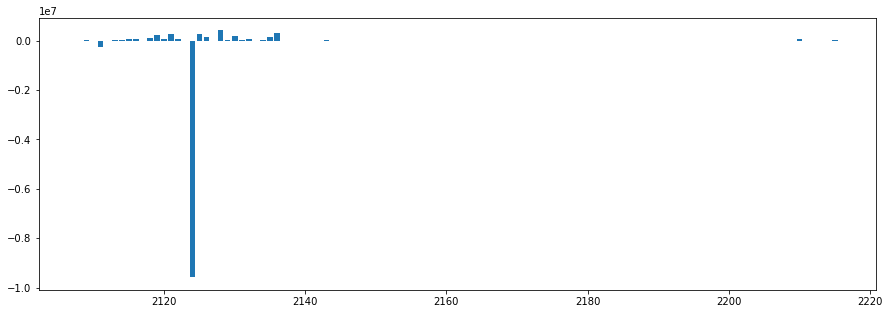

In [22]:
temp1 = redacted_df2.groupby('original_zip')['Rental Relief Gap'].sum().reset_index(name="Rental Relief Gap sum")
temp2 = redacted_df2.groupby('original_zip')['Total RRF Award'].sum().reset_index(name="Total RRF Award sum")
temp = temp1.merge(temp2)
temp['difference'] = temp['Total RRF Award sum'] - temp['Rental Relief Gap sum']

plt.figure(figsize=(15,5))
plt.bar(temp['original_zip'], temp['difference'])
#temp

In [20]:
temp['difference'].nsmallest(1)

13   -9591699.7
Name: difference, dtype: float64

,original_zip,Rental Relief Gap sum,Total RRF Award sum,difference
0,2108.0,19818.52,25700.00,5881.480000
1,2109.0,6200.00,18924.19,12724.190000
2,2110.0,1168.00,5840.00,4672.000000
3,2111.0,460484.13,192829.84,-267654.290000
4,2113.0,50043.61,61769.82,11726.210000
5,2114.0,61576.93,72361.32,10784.390000
6,2115.0,53935.11,107720.24,53785.130000
7,2116.0,75102.79,132748.26,57645.470000
8,2118.0,201921.09,300921.24,99000.150000
9,2119.0,613196.83,861698.49,248501.660000


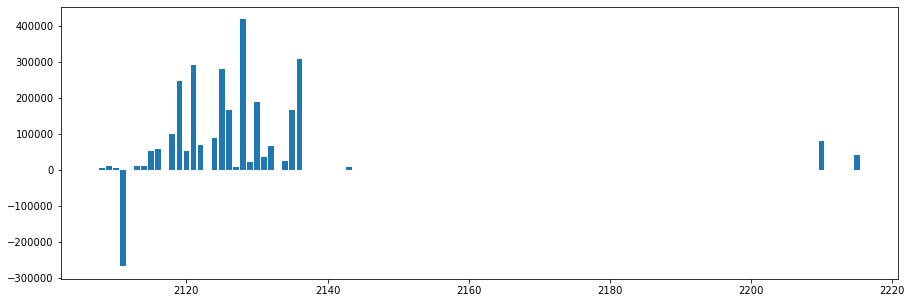

In [21]:
temp['difference'][13] = 0
temp['difference'][13] = temp['difference'].mean()

plt.figure(figsize=(15,5))
plt.bar(temp['original_zip'], temp['difference'])
temp

<ipython-input-23-77c4b72c6c68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['ratio'] = temp_df['Total RRF Award sum'] /temp_df['Rental Relief Gap sum']


Text(0.5, 1.0, 'Rent owing vs Total RRF Award in different original_zip')

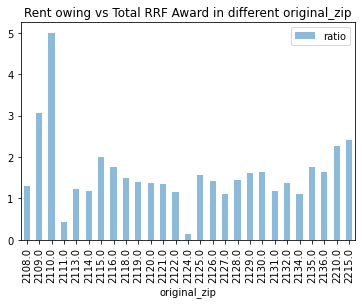

In [23]:
temp_df = temp.loc[temp['Rental Relief Gap sum']!=0]
temp_df['ratio'] = temp_df['Total RRF Award sum'] /temp_df['Rental Relief Gap sum']

temp_df[['ratio', 'original_zip']].groupby('original_zip').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title('Rent owing vs Total RRF Award in different original_zip')

# Analysis of Business Licenses

In [1]:
import pandas as pd
from pyproj import Proj, transform
import folium
from folium.plugins import HeatMap
import numpy as np
import matplotlib.pyplot as plt
import requests
import urllib.parse
df_food = pd.read_csv("active_food_est_licenses.csv")
df_food.index.title = "Food Licenses"
df_liquor = pd.read_csv("liquor_licenses.csv")
df_liquor.index.title = "Liquor Licenses"
df_cannabis = pd.read_csv("Cannabis_Registry.csv")
df_cannabis.index.title = "Cannabis Licenses"
df_licensing = pd.read_csv("licensing_board.csv")
df_licensing.index.title = "General Licenses"

In [2]:
df_food = df_food.drop(['LICSTATUS'], axis = 1)
fulladdr = []
for i in list(zip(df_food['Address'], df_food['CITY'], df_food['State'], df_food['ZIP'])):
    fulladdr.append(f"{i[0]}, {i[1]}, {i[2]}, {i[3]}")
df_food['fulladdress'] = fulladdr
df_food

,BusinessName,DBAName,Address,CITY,State,ZIP,LICENSECAT,DESCRIPT,LicenseAddDtTm,dayphn,Property_ID,Latitude,Longitude,fulladdress
0,# 7 RESTAURANT,NaN,225 Grove,West Roxbury,MA,02132,FT,Eating & Drinking w/ Take Out,2007-03-23 15:20:59,10000000000,156965.0,42.261873,-71.157410,"225 Grove, West Roxbury, MA, 02132"
1,100 Federal Market & Barista- 11th Floor,NaN,100 Federal,Boston,MA,02110,FT,Eating & Drinking w/ Take Out,2021-01-12 10:37:24,16174345000,57150.0,42.354770,-71.056130,"100 Federal, Boston, MA, 02110"
2,100 Percent Delicias Express,NaN,656 Centre,Jamaica Plain,MA,02130,FT,Eating & Drinking w/ Take Out,2017-11-28 10:27:47,18572505689,28152.0,42.312830,-71.113860,"656 Centre, Jamaica Plain, MA, 02130"
3,11 Dining -16th Fl.,NaN,200 Berkeley,Boston,MA,02116,FS,Eating & Drinking,2019-12-20 09:32:17,10000000000,187943.0,42.349860,-71.072910,"200 Berkeley, Boston, MA, 02116"
4,110 Grill,NaN,25 Jan Karski,Dorchester,MA,02125,FS,Eating & Drinking,2018-11-29 14:14:04,19786929450,421286.0,0.000000,0.000000,"25 Jan Karski, Dorchester, MA, 02125"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,ZESTO'S PIZZA,NaN,460 Centre,Jamaica Plain,MA,02130,FT,Eating & Drinking w/ Take Out,2011-04-28 08:54:10,16175242004,28061.0,42.319350,-71.111540,"460 Centre, Jamaica Plain, MA, 02130"
3027,Ziggy's,NaN,583 Washington,Brighton,MA,02135,FT,Eating & Drinking w/ Take Out,2020-10-23 12:17:07,16178333508,351055.0,0.000000,0.000000,"583 Washington, Brighton, MA, 02135"
3028,Zo,NaN,92 State,Boston,MA,02109,FT,Eating & Drinking w/ Take Out,2011-12-16 09:44:46,16179016017,170003.0,42.359232,-71.055320,"92 State, Boston, MA, 02109"
3029,Zuma Restaurant,NaN,1 Dalton,Boston,MA,02115,FS,Eating & Drinking,2018-02-16 10:18:58,18574492500,351070.0,0.000000,0.000000,"1 Dalton, Boston, MA, 02115"


In [3]:
fulladdr = []
for i in list(zip(df_liquor['address'], df_liquor['city'], df_liquor['state'], df_liquor['zip'])):
    fulladdr.append(f"{i[0]}, {i[1]}, {i[2]}, {i[3]}")
df_liquor['fulladdress'] = fulladdr

df_liquor = df_liquor.drop(['gpsx', 'gpsy'], axis = 1)
df_liquor

,license_num,historicallicensenum,status,license_type,issued,expires,business_name,dba_name,comments,location_comments,...,capacity,applicant,manager,day_phone,evening_phone,address,city,state,zip,fulladdress
0,LB-485386,NaN,Active,Retail Malt Wine,NaN,NaN,Dorchester Market LLC,Dorchester Market,NaN,Accessory retail sales of wine & malt beverage...,...,0.0,Dorchester Market LLC,Peter McGee,(617)238-7406,NaN,951- Dorchester AV,Dorchester,MA,02125,"951- Dorchester AV, Dorchester, MA, 02125"
1,LB-481088,NaN,Active,CV7ALN - Neighborhood Restricted,2022-09-29,2022-12-31,Yak Thai Inc.,Thonglor,NaN,"1,000SF: in one room on first floor (seating f...",...,32.0,Yak Thai Inc.,Piyapong Wongla,(781)472-0835,NaN,559- Washington ST,Brighton,MA,02135,"559- Washington ST, Brighton, MA, 02135"
2,LB-476655,NaN,Active,CV7ALN - Neighborhood Restricted,2022-09-26,2022-12-31,HOMESTEAD BAKERY & CAFE LLC,NaN,NaN,homestead bakery & cafe LLC is located on the ...,...,0.0,homestead bakery & cafe LLC,Annie Le,(617)858-0468,NaN,1448- Dorchester AVE,Dorchester,MA,02122,"1448- Dorchester AVE, Dorchester, MA, 02122"
3,LB-445763,NaN,Active,Retail Malt Wine,2022-08-30,2022-12-31,Grove Hall Foods Corp.,Grove Hall Convenience Market II,NaN,NaN,...,0.0,Grove Hall Foods Corp.,Edward Guerrero,(617)708-0775,NaN,292- Talbot AVE,Boston,MA,02124,"292- Talbot AVE, Boston, MA, 02124"
4,LB-469486,NaN,Active,Retail Malt Wine,2022-08-24,2022-12-31,Rupal Corporation,J&J Discount Mini Mart,No singles,Premise is located at 131 West Broadway South ...,...,0.0,Rupal Corporation,Michael David Gannon,(617)268-0455,NaN,131- W Broadway,South Boston,MA,02127,"131- W Broadway , South Boston, MA, 02127"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441,LB-101595,GOPWM0001,Active,GOP Malt Wine,2013-10-01,2022-12-31,LYRIC STAGE COMPANY,LYRIC STAGE,11 00 M to P,140 CLARENDON STREET; ON THE SECOND FLOOR THEA...,...,244.0,LYRIC STAGE COMPANY,Matt Chapuran,NaN,776-8280,140- Clarendon ST,Boston,MA,02116,"140- Clarendon ST, Boston, MA, 02116"
1442,LB-101596,GOPWM0004,Active,GOP Malt Wine Liq.,2013-10-01,2022-12-31,"BOSTON CULINARY GROUP, INC.",THE ORPHEUM THEATRE,1 CONSUMPTION ALCOHOL ALLOWED IN SEATING AREA ...,"IN WHOLE OF ORPHEUM THEATRE, INCLUDING BAR SER...",...,2763.0,"BOSTON CULINARY GROUP, INC.",Sean O'Dwyer,NaN,(781)659-9923,1- Hamilton Pl,Boston,MA,02108,"1- Hamilton Pl, Boston, MA, 02108"
1443,LB-101611,GOPWML0009,Active,GOP Malt Wine Liq.,2013-10-01,2022-12-31,"EMANUEL ENTERPRISES, LLC",NaN,NaN,Entrance on first floor; one room on first fl...,...,49.0,"EMANUEL ENTERPRISES, LLC",EDGAR OSPINA,NaN,(617)608-0899,71-73 Meridian ST,East Boston,MA,02128,"71-73 Meridian ST, East Boston, MA, 02128"
1444,LB-98819,CLBALA0002,Active,Clb. All Alc. Airport,2013-10-01,2022-12-31,"AMERICAN AIRLINES, INC.",ADMIRALS CLUB,NaN,"Approximately 15,317 Sq. Ft. retail space with...",...,280.0,"AMERICAN AIRLINES, INC.",Susan Namdar,NaN,(781)944-1506,"Logan Airport, Terminal B",East Boston,MA,02128,"Logan Airport, Terminal B , East Boston..."


In [4]:
addr = df_cannabis['Facility_Address'].map(lambda x: x.split(","))
street = addr.map(lambda x: x[0].replace("\n", " ").strip())
city = addr.map(lambda x: x[-2].strip())
state = addr.map(lambda x: 'MA')
zipcode = addr.map(lambda x: x[-1][-5:] if len(x[-1]) > 5 else np.nan)
df_cannabis['street'] = street
df_cannabis['city'] = city
df_cannabis['state'] = state
df_cannabis['zip'] = zipcode

x_copy = df_cannabis['x']
df_cannabis['x'] = df_cannabis['y']
df_cannabis['y'] = x_copy

In [5]:
inProj = Proj(init='epsg:2249', preserve_units = True)
outProj = Proj(init='epsg:4326')

df_licensing = df_licensing.drop(['gpsx', 'gpsy'], axis = 1)

df_licensing

/Users/software/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/software/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,license_num,historicallicensenum,status,license_category,license_type,issued,expires,business_name,dba_name,comments,...,patronsout,capacity,applicant,manager,day_phone,evening_phone,address,city,state,zip
0,LB-485386,NaN,Active,Misc,Retail Malt Wine,NaN,NaN,Dorchester Market LLC,Dorchester Market,NaN,...,NaN,0.0,Dorchester Market LLC,Peter McGee,(617)238-7406,NaN,951- Dorchester AV,Dorchester,MA,02125
1,LB-481806,NaN,Active,CV,Common Victualler,2022-10-13,2022-12-31,"Food's Style USA, Inc.",Hokkaido Ramen Santouka,NaN,...,11:30 PM,32.0,"Food's Style USA, Inc.",Tatsunori Tanaka,(206)889-2069,NaN,169- Brighton AVE,Allston,MA,02134
2,LB-492447,NaN,Active,CV,Common Victualler,2022-10-03,2022-12-31,Tori EB Food Inc.,Tori Japan,NaN,...,10:30 PM,12.0,Tori EB Food Inc.,Min Zhu,(781)609-8753,NaN,62- William C Kelly SQ,East Boston,MA,02128
3,LB-481088,NaN,Active,CV,CV7ALN - Neighborhood Restricted,2022-09-29,2022-12-31,Yak Thai Inc.,Thonglor,NaN,...,11:30 PM,32.0,Yak Thai Inc.,Piyapong Wongla,(781)472-0835,NaN,559- Washington ST,Brighton,MA,02135
4,LB-423922,NaN,Active,CV,Common Victualler,2022-09-28,2022-12-31,"PNR, LLC",PICK N' ROLL SUSHI,Hours Operation Monday Saturday 11 00 AM 8 PM,...,8:30 PM,28.0,"PNR, LLC",Victor Choi,(617)251-5829,NaN,134- Boylston ST,Boston,MA,02116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3324,LB-107538,NaN,Active,Misc,Dormitory,2013-09-16,2023-04-30,TRUSTEES OF BOSTON UNIVERSITY,BOSTON UNIVERSITY,No Conditions,...,NaN,0.0,Trustees of Boston University,NISHMIN KASHYAP,(617)353-2148,(617)353-2148,826- Beacon ST,Boston,MA,02215
3325,LB-107590,NaN,Active,Misc,Dormitory,2013-09-16,2023-04-30,TRUSTEES OF BOSTON UNIVERSITY,BOSTON UNIVERSITY,No Conditions,...,NaN,0.0,Trustees of Boston University,NISHMIN KASHYAP,(617)353-2148,(617)353-2148,844-844A Beacon ST,Boston,MA,02215
3326,LB-108942,NaN,Active,CV,Common Victualler,2013-09-04,2022-12-31,"WHOLE FOODS MARKET GROUP, INC.",Whole Foods Market,NaN,...,10:30 PM,40.0,"Whole Foodsmarket Group, Inc.",Dorothy Pumphrey,(617)492-5500,NaN,27- Austin St,Charlestown,MA,02129
3327,LB-109265,NaN,Active,CV,Common Victualler,2013-08-30,2022-12-31,"Sultana's Bakery & Cafe, LLC","Boston Croissant Bakery, Cafe",1 7 00 AM PM Mon Sat 9 6 on Sundays,...,7:30 PM,4.0,"Sultana's Bakery & Cafe, LLC",Lale Dogar,(617)202-5454,NaN,1585- Commonwealth AVE,Brighton,MA,02135


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
 
def list(df,label):
    df[label] = df[label].copy().apply(lambda x: str(x).lower().replace(" ", "").replace("/", ""))
    uniquevals = df[label].value_counts()
    size=uniquevals.values.tolist()
    label=uniquevals.keys().tolist()
    sizes=[1686, 238]
    labels=['boston', 'dorchester']
    
    print(size)
    print(label)

In [7]:
list(df_food, 'CITY')
list(df_liquor, 'city')
list(df_cannabis, 'city')
list(df_licensing, 'city')

[1686, 238, 208, 153, 149, 138, 95, 93, 60, 57, 38, 36, 34, 32, 5, 4, 2, 2, 1]
['boston', 'dorchester', 'eastboston', 'brighton', 'roxbury', 'allston', 'southboston', 'jamaicaplain', 'roslindale', 'westroxbury', 'charlestown', 'mattapan', 'hydepark', 'missionhill', '', 'financialdistrict', 'chestnuthill', 'downtownfinancialdistrict', 'southend']
[783, 127, 100, 98, 77, 53, 48, 42, 32, 27, 25, 18, 11, 3, 2]
['boston', 'eastboston', 'dorchester', 'roxbury', 'southboston', 'brighton', 'allston', 'jamaicaplain', 'roslindale', 'westroxbury', 'charlestown', 'hydepark', 'mattapan', 'missionhill', 'chestnuthill']
[13, 10, 5, 5, 5, 4, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1]
['dorchester', 'boston', 'roxbury', 'roslindale', 'eastboston', 'allston', 'jamaicaplain', 'charlestown', 'westroxbury', 'brighton', 'mattapan', 'hydepark', 'southend', 'backbay', 'southboston', 'missionhill', 'westend']
[1763, 267, 236, 208, 148, 141, 135, 114, 77, 61, 47, 43, 43, 39, 4, 1, 1, 1]
['boston', 'dorchester', 'eastbost

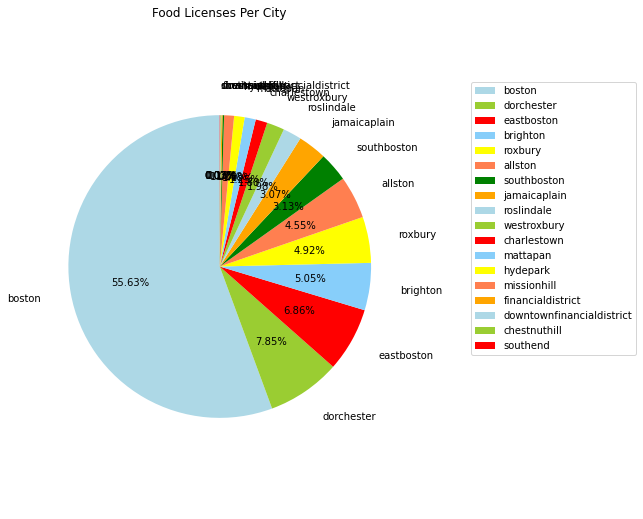

In [8]:
labels=['boston', 'dorchester', 'eastboston', 'brighton', 'roxbury', 'allston', 'southboston', 'jamaicaplain', 'roslindale', 'westroxbury', 'charlestown', 'mattapan', 'hydepark', 'missionhill', '', 'financialdistrict', 'downtownfinancialdistrict', 'chestnuthill', 'southend']
sizes=[1686, 238, 208, 153, 149, 138, 95, 93, 60, 57, 38, 36, 34, 32, 5, 4, 2, 2, 1]
plt.figure(figsize=(6,9)) 
colors = ['lightblue','yellowgreen','red','lightskyblue','yellow',"coral","green","orange"] 
patches,text1, text2 = plt.pie(sizes,
                      labels=labels,
                      colors=colors,
                      labeldistance = 1.2,
                      autopct = '%3.2f%%', 
                      shadow = False, 
                      startangle =90,
                      pctdistance = 0.6) 
plt.axis('equal')
plt.title("Food Licenses Per City")
plt.legend(loc='center', bbox_to_anchor=(1.5, 0.6),ncol=1)
plt.show()

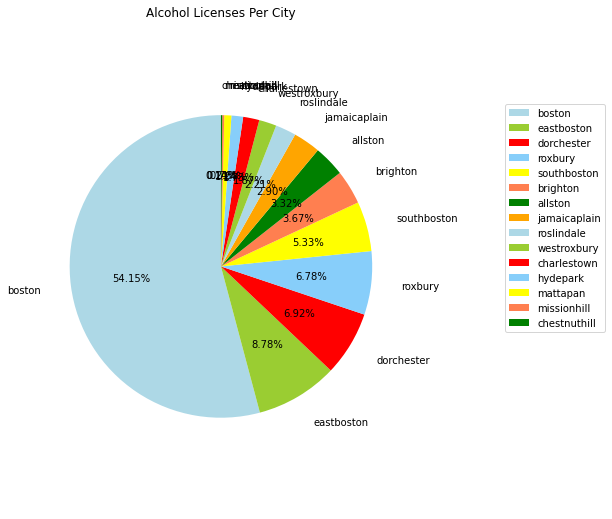

In [9]:
labels=['boston', 'eastboston', 'dorchester', 'roxbury', 'southboston', 'brighton', 'allston', 'jamaicaplain', 'roslindale', 'westroxbury', 'charlestown', 'hydepark', 'mattapan', 'missionhill', 'chestnuthill']
sizes=[783, 127, 100, 98, 77, 53, 48, 42, 32, 27, 25, 18, 11, 3, 2]
plt.figure(figsize=(6,9)) 
colors = ['lightblue','yellowgreen','red','lightskyblue','yellow',"coral","green","orange"]
patches,text1, text2 = plt.pie(sizes,
                      labels=labels,
                      colors=colors,
                      labeldistance = 1.2,
                      autopct = '%3.2f%%', 
                      shadow = False, 
                      startangle =90,
                      pctdistance = 0.6) 
plt.axis('equal')
plt.title("Alcohol Licenses Per City")
plt.legend(loc='center', bbox_to_anchor=(1.5, 0.6),ncol=1)
plt.show()

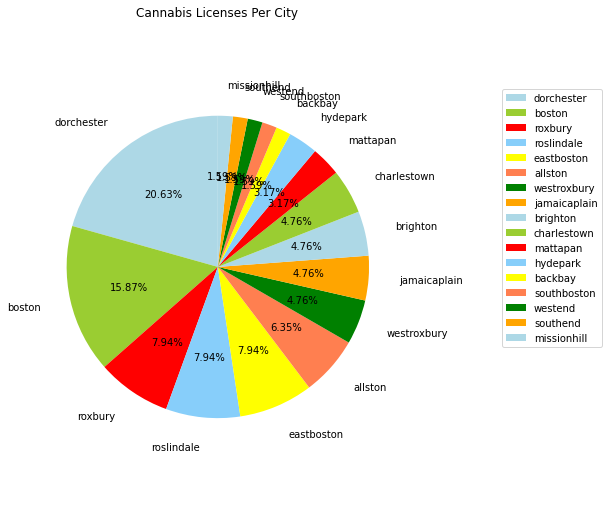

In [10]:
labels=['dorchester', 'boston', 'roxbury', 'roslindale', 'eastboston', 'allston', 'westroxbury', 'jamaicaplain', 'brighton', 'charlestown', 'mattapan', 'hydepark', 'backbay', 'southboston', 'westend', 'southend', 'missionhill']
sizes=[13, 10, 5, 5, 5, 4, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1]
plt.figure(figsize=(6,9)) 
colors = ['lightblue','yellowgreen','red','lightskyblue','yellow',"coral","green","orange"]
patches,text1, text2 = plt.pie(sizes,
                      labels=labels,
                      colors=colors,
                      labeldistance = 1.2,
                      autopct = '%3.2f%%', 
                      shadow = False, 
                      startangle =90,
                      pctdistance = 0.6) 
plt.axis('equal')
plt.title("Cannabis Licenses Per City")
plt.legend(loc='center', bbox_to_anchor=(1.5, 0.6),ncol=1)
plt.show()

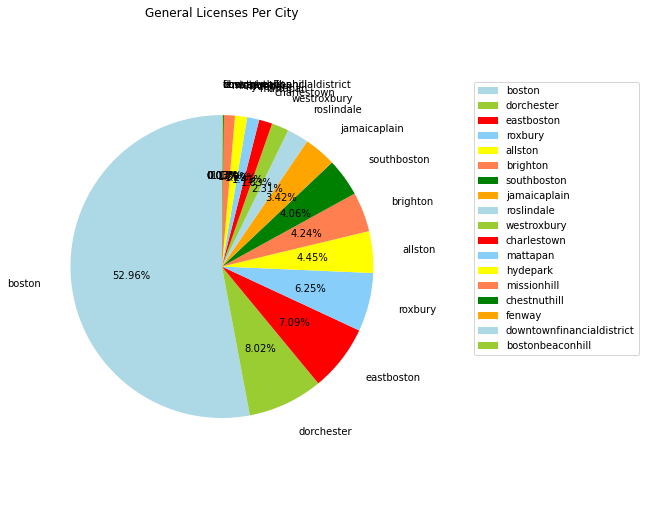

In [11]:
labels=['boston', 'dorchester', 'eastboston', 'roxbury', 'allston', 'brighton', 'southboston', 'jamaicaplain', 'roslindale', 'westroxbury', 'charlestown', 'mattapan', 'hydepark', 'missionhill', 'chestnuthill', 'fenway', 'downtownfinancialdistrict', 'bostonbeaconhill']
sizes=[1763, 267, 236, 208, 148, 141, 135, 114, 77, 61, 47, 43, 43, 39, 4, 1, 1, 1]
plt.figure(figsize=(6,9)) 
colors = ['lightblue','yellowgreen','red','lightskyblue','yellow',"coral","green","orange"]
patches,text1, text2 = plt.pie(sizes,
                      labels=labels,
                      colors=colors,
                      labeldistance = 1.2,
                      autopct = '%3.2f%%', 
                      shadow = False, 
                      startangle =90,
                      pctdistance = 0.6) 
plt.axis('equal')
plt.title("General Licenses Per City")
plt.legend(loc='center', bbox_to_anchor=(1.5, 0.6),ncol=1)
plt.show()